In [1]:
import tensorflow._api.v2.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()
from PIL import Image 
# print('Pillow Version:', PIL.__version__)
from numpy import asarray

import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
features = 8
hidden_layer_nodes = 3
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 25])
W1 = tf.Variable(tf.truncated_normal([features,hidden_layer_nodes], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_nodes]))
z1 = tf.add(tf.matmul(x,W1),b1)
a1 = tf.nn.relu(z1)
W2 = tf.Variable(tf.truncated_normal([hidden_layer_nodes,1], stddev=0.1))
b2 = tf.Variable(0.)
z2 = tf.matmul(a1,W2) + b2
pred = 1 / (1.0 + tf.exp(-z2))
loss = tf.reduce_mean(-(y_ * tf.log(pred) + (1 - y_) * tf.log( 1 - pred)))
alfa = 0.000001
update = tf.train.GradientDescentOptimizer(alfa).minimize(loss)


## data function


In [3]:
def YtoArr(y):
    arr = []
    for i in y:
        tmp = []
        for j in range(25):
            if (int(i/10) == j) :
                tmp.append(1)
            else :
                tmp.append(0)
        arr.append(tmp)
    return arr

def get_XY_from_image(photo_name:str,color:int,jumps:int=100,show:bool=False):
    data = asarray(Image.open(photo_name))
    color_arr = data[:,:,color]
    image_color_arr = Image.fromarray(color_arr)
    if show: image_color_arr.show()
    data_x = []
    data_y = []
    print(f"pic size: {len(color_arr)}x{len(color_arr[0])} name: {photo_name}")
    for i in range(1,len(color_arr)-1,jumps):
        for j in range(1,len(color_arr[0])-1):
            temp_y = [color_arr[i][j]]
            temp_x = [color_arr[i-1][j-1],color_arr[i-1][j],color_arr[i][j-1],color_arr[i+1][j],color_arr[i][j+1],color_arr[i+1][j+1],color_arr[i-1][j+1],color_arr[i+1][j-1]]
            data_y.append(temp_y)
            data_x.append(temp_x)
    return (data_x,data_y)

def load_pic_data(pics_array,color:int,jumps:int=100,show:bool=False):
    data_x , data_y = get_XY_from_image(pics_array[0],color,jumps,show)
    for i in pics_array[1:]:
        data_tmp_x , data_tmp_y = get_XY_from_image(i,color,jumps,show)
        data_x = np.append(data_x,data_tmp_x,axis=0)
        data_y = np.append(data_y,data_tmp_y,axis=0)
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    return data_x,data_y

## data

In [4]:
data_x , data_y = load_pic_data(
    ["data/cat_test.jpg","data/balloon.jpg","data/cat.jpg","data/city.jpg","data/city_night.jpg","data/city_color.jpg",
    "data/flower.jpg"],
    color=0,jumps=100)
data_t_x , data_t_y = load_pic_data(["data/park.jpg"],color=1,jumps=100)
# print(data_t_y)
# print(YtoArr(data_t_y))
data_y = YtoArr(data_y)
data_t_y = YtoArr(data_t_y)


# data_x = np.array([[2,32], [25,1.2], [5,25.2], [23,2], [56,8.5], [60,60], [3,3], [46,53], [3.5,2]])
# data_y = np.array([[1], [1], [1], [1], [1], [0], [0], [0], [0]])

pic size: 681x1024 name: data/cat_test.jpg
pic size: 480x720 name: data/balloon.jpg
pic size: 576x1024 name: data/cat.jpg
pic size: 664x1080 name: data/city.jpg
pic size: 1282x2278 name: data/city_night.jpg
pic size: 539x959 name: data/city_color.jpg
pic size: 600x800 name: data/flower.jpg
pic size: 588x830 name: data/park.jpg


In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
show = 10
loss_in_time = []
w_arr = []
test_over_time = []
for i in range(0,100):
       sess.run(update, feed_dict = {x:data_x, y_:data_y})
       if(i%show==0):
              tmp = sess.run(loss,feed_dict={x:data_x,y_:data_y})
              loss_in_time.append(tmp)
              w_arr.append(sess.run(W1))
              if(i%(show*1)==0):
                     print(f"i = {i}, loss = {tmp},")
              
              test_over_time.append(sess.run(loss,feed_dict={x:data_t_x,y_:data_t_y}))


i = 0, loss = 0.387279212474823,
i = 10, loss = 0.3871800899505615,
i = 20, loss = 0.3870811462402344,
i = 30, loss = 0.3869825005531311,
i = 40, loss = 0.3868839740753174,
i = 50, loss = 0.38678550720214844,
i = 60, loss = 0.3866872787475586,
i = 70, loss = 0.38658925890922546,
i = 80, loss = 0.3864913284778595,
i = 90, loss = 0.38639363646507263,


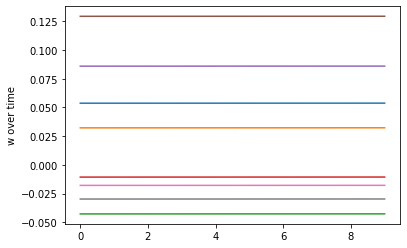

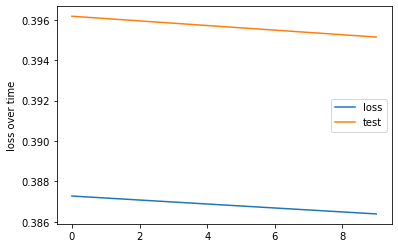

In [6]:
d = np.array(np.array(w_arr).transpose()[0]).transpose()
plt.plot(d)
plt.ylabel('w over time')
plt.show()

plt.plot(loss_in_time,label ="loss")
plt.plot(test_over_time , label ="test")
plt.legend()
plt.ylabel('loss over time')
plt.show()

In [30]:
#print(sess.run(pred,feed_dict={x:[234,23,45,56,89,24,78,96]}))
# x = tf.placeholder(tf.float32, [None, features])
# y_ = tf.placeholder(tf.float32, [None, 25])
# W1 = tf.Variable(tf.truncated_normal([features,hidden_layer_nodes], stddev=0.1))
# b1 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_nodes]))
# z1 = tf.add(tf.matmul(x,W1),b1)
# a1 = tf.nn.relu(z1)
# W2 = tf.Variable(tf.truncated_normal([hidden_layer_nodes,1], stddev=0.1))
# b2 = tf.Variable(0.)
# z2 = tf.matmul(a1,W2) + b2
# pred = 1 / (1.0 + tf.exp(-z2))

#print(np.array([234,23,45,56,89,24,78,96]).transpose())
# print(sess.run(W1))
# print(tf.add(tf.matmul(np.matrix([234,23,45,56,89,24,78,96]),sess.run(W1)),sess.run(b1)))
zz1 = tf.add(tf.matmul(np.matrix([234,23,45,56,89,24,78,96]),sess.run(W1)),sess.run(b1))
aa1 = tf.nn.relu(zz1)
#zz2 = 
# print(a)
print(sess.run(pred,feed_dict={x:[[234,23,45,56,89,24,78,96]]}))



[[0.30113214]]
